<a href="https://colab.research.google.com/github/shounakd56/Image-Caption-Generation-using-Deep-Learning/blob/main/Week%201/WiDS_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train=pd.read_csv("/content/gdrive/MyDrive/WiDS/CV/corrected train set.csv")
test=pd.read_csv("/content/gdrive/MyDrive/WiDS/CV/week 1 test.csv")

In [ ]:
train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [ ]:
train.shape

(16108, 26)

In [ ]:
test.shape

(10462, 25)

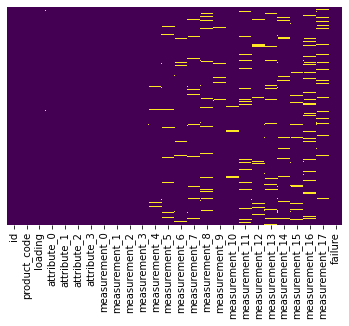

In [ ]:
# Heat Map to check number of null values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

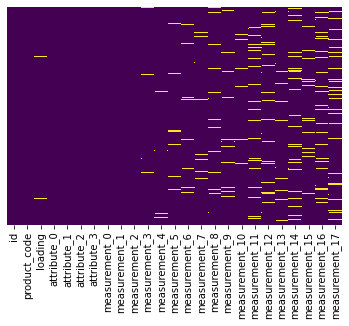

In [ ]:
# Heat Map to check number of null values
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Number of null values (Columnwise)
test.isnull().sum()

id                  0
product_code        0
loading           111
attribute_0         0
attribute_1         0
attribute_2         0
attribute_3         0
measurement_0       0
measurement_1       0
measurement_2       0
measurement_3     153
measurement_4     218
measurement_5     249
measurement_6     306
measurement_7     377
measurement_8     408
measurement_9     482
measurement_10    495
measurement_11    590
measurement_12    644
measurement_13    722
measurement_14    790
measurement_15    806
measurement_16    821
measurement_17    939
dtype: int64

In [ ]:
# Number of null values (Columnwise)
train.isnull().sum()

id                   0
product_code         0
loading            139
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      228
measurement_4      320
measurement_5      427
measurement_6      490
measurement_7      560
measurement_8      640
measurement_9      745
measurement_10     805
measurement_11     878
measurement_12     957
measurement_13    1052
measurement_14    1084
measurement_15    1203
measurement_16    1289
measurement_17    1345
failure              0
dtype: int64

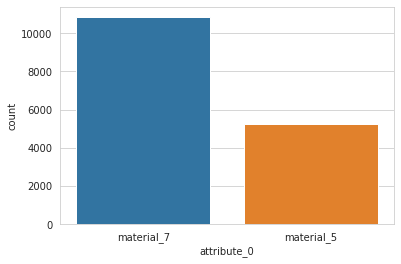

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='attribute_0',data=train)


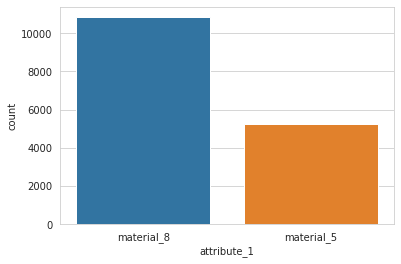

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='attribute_1',data=train)


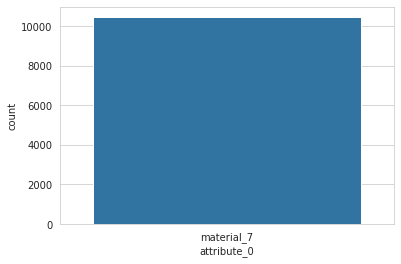

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='attribute_0',data=test)


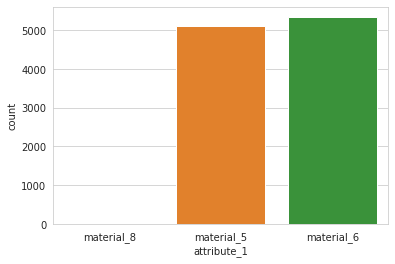

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='attribute_1',data=test)


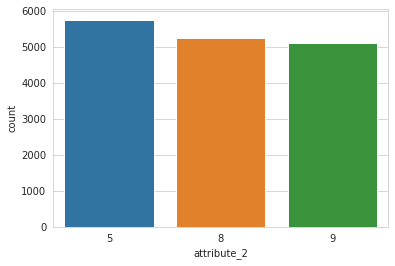

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='attribute_2',data=train)


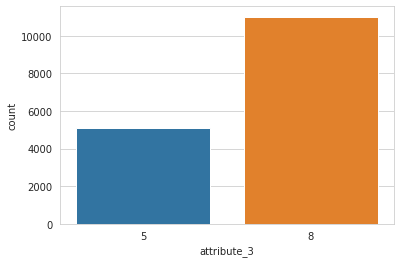

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='attribute_3',data=train)


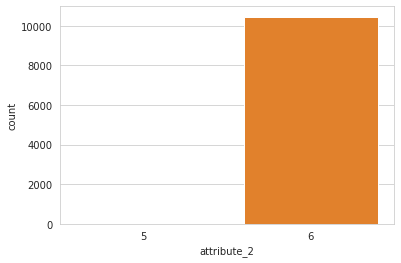

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='attribute_2',data=test)


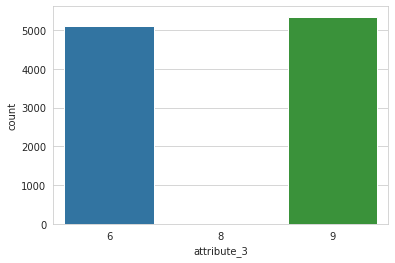

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='attribute_3',data=test)


In [ ]:
y=train.failure
# Dropping features  which can't be used for training 
X = train.drop(['id','product_code','attribute_1','attribute_2','attribute_3','failure'], axis=1)


***Dealing with the Training Data***






In [ ]:
cat = (X.dtypes == 'object')
object_cols = list(cat[cat].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['attribute_0']


In [ ]:
#One Hot Encoding on Training Data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_X1=pd.DataFrame(encoder.fit_transform(X[['attribute_0']]))
encoded_X1.index=X.index
encoded_X2 = X.drop(['attribute_0'], axis=1)
encoded_X = pd.concat([encoded_X2, encoded_X1], axis=1)


,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,...,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,0,1
0,80.10,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,...,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0.0,1.0
1,84.89,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,...,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0.0,1.0
2,82.43,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,...,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0.0,1.0
3,101.07,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,...,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0.0,1.0
4,188.06,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,...,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,146.70,9,11,5,16.593,13.078,18.468,18.992,11.965,20.553,...,16.852,17.614,10.440,NaN,17.342,17.142,16.400,930.313,0.0,1.0
16104,117.38,11,9,5,18.525,11.704,17.439,17.027,11.927,18.433,...,NaN,18.973,11.200,15.186,15.177,13.470,15.399,694.168,0.0,1.0
16105,107.34,10,2,3,18.019,11.518,18.387,17.310,13.082,18.659,...,15.811,20.374,15.021,17.156,15.901,15.724,17.049,797.928,0.0,1.0
16106,126.46,2,17,6,17.057,13.234,15.955,17.352,13.271,19.107,...,16.035,19.594,9.869,15.371,17.682,15.109,15.961,697.844,0.0,1.0


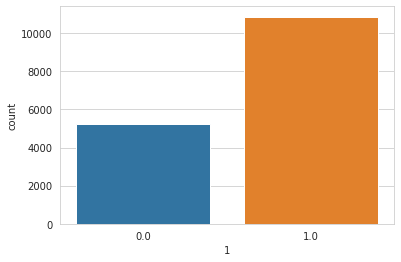

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x=1,data=encoded_X)


In [ ]:
# Filling missing values with the mean value of that column
from sklearn.impute import SimpleImputer
imputer=SimpleImputer()
imputed_X = pd.DataFrame(imputer.fit_transform(encoded_X))
imputed_X.columns = encoded_X.columns
imputed_X

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,...,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,0,1
0,80.10,7.0,8.0,4.0,18.040,12.518,15.748,19.292,11.739,20.155,...,15.859000,17.594000,15.193,15.02900,16.10627,13.034,14.684,764.100,0.0,1.0
1,84.89,14.0,3.0,3.0,18.213,11.540,17.717,17.893,12.748,17.889,...,17.947000,17.915000,11.755,14.73200,15.42500,14.395,15.631,682.057,0.0,1.0
2,82.43,12.0,1.0,5.0,18.057,11.652,16.738,18.240,12.718,18.288,...,15.607000,19.094749,13.798,16.71100,18.63100,14.094,17.946,663.376,0.0,1.0
3,101.07,13.0,2.0,6.0,17.295,11.188,18.576,18.339,12.583,19.060,...,16.346000,18.377000,10.020,15.25000,15.56200,16.154,17.172,826.282,0.0,1.0
4,188.06,9.0,2.0,8.0,19.346,12.950,16.990,15.746,11.306,18.093,...,17.082000,19.932000,12.428,16.18200,12.76000,13.153,16.412,579.885,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,146.70,9.0,11.0,5.0,16.593,13.078,18.468,18.992,11.965,20.553,...,16.852000,17.614000,10.440,15.68946,17.34200,17.142,16.400,930.313,0.0,1.0
16104,117.38,11.0,9.0,5.0,18.525,11.704,17.439,17.027,11.927,18.433,...,16.115783,18.973000,11.200,15.18600,15.17700,13.470,15.399,694.168,0.0,1.0
16105,107.34,10.0,2.0,3.0,18.019,11.518,18.387,17.310,13.082,18.659,...,15.811000,20.374000,15.021,17.15600,15.90100,15.724,17.049,797.928,0.0,1.0
16106,126.46,2.0,17.0,6.0,17.057,13.234,15.955,17.352,13.271,19.107,...,16.035000,19.594000,9.869,15.37100,17.68200,15.109,15.961,697.844,0.0,1.0


In [ ]:
imputed_X.isnull().sum()
# No null values now

loading           0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
0                 0
1                 0
dtype: int64

In [ ]:
# Splitting training data to get data for validation
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(imputed_X, y)


In [ ]:
# Importing and training the model
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
model.fit(X_train, y_train,  eval_set=[(X_valid, y_valid)], 
             early_stopping_rounds=5, 
             verbose=False)

[16:01:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, n_estimators=1000, n_jobs=4)

In [ ]:
# Calculating MAE from the validation data
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(model.predict(X_valid),y_valid))

0.3428270154594931


***Dealing with the Testing Data***






In [ ]:
test

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,16108,C,145.08,material_7,material_8,5,8,9,7,8,...,18.218,12.015,15.247,NaN,11.303,16.717,16.768,14.707,17.190,658.222
1,16109,C,146.34,material_7,material_8,5,8,2,7,1,...,NaN,NaN,16.215,20.778,9.195,16.047,NaN,15.759,18.393,616.670
2,16110,C,118.14,material_7,material_8,5,8,1,9,3,...,16.701,11.181,16.391,20.434,9.365,16.182,15.934,12.487,14.615,433.006
3,16111,C,119.86,material_7,material_8,5,8,10,9,9,...,19.437,10.959,16.567,18.430,11.836,15.767,18.049,15.346,15.337,572.642
4,16112,C,122.66,material_7,material_8,5,8,8,9,9,...,18.068,10.333,18.631,17.557,11.959,16.202,14.098,14.110,15.025,486.221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,19.354,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131
10458,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,19.563,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924
10459,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,19.279,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364
10460,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,19.358,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156


In [ ]:
# Dropping features  which can't be tested
a=test.drop(['id','product_code','attribute_1','attribute_2','attribute_3'], axis=1)
cat = (a.dtypes == 'object')
object_cols2 = list(cat[cat].index)

print("Categorical variables:")
print(object_cols2)

Categorical variables:
['attribute_0']


In [ ]:
a

,loading,attribute_0,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,145.08,material_7,9,7,8,16.863,10.156,18.038,16.607,10.934,18.218,12.015,15.247,NaN,11.303,16.717,16.768,14.707,17.190,658.222
1,146.34,material_7,2,7,1,18.303,12.670,17.570,15.942,12.557,NaN,NaN,16.215,20.778,9.195,16.047,NaN,15.759,18.393,616.670
2,118.14,material_7,1,9,3,16.883,12.024,16.738,16.299,11.304,16.701,11.181,16.391,20.434,9.365,16.182,15.934,12.487,14.615,433.006
3,119.86,material_7,10,9,9,17.686,10.697,16.481,16.394,NaN,19.437,10.959,16.567,18.430,11.836,15.767,18.049,15.346,15.337,572.642
4,122.66,material_7,8,9,9,18.132,13.269,NaN,16.503,12.544,18.068,10.333,18.631,17.557,11.959,16.202,14.098,14.110,15.025,486.221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,158.95,material_7,6,16,4,16.301,13.259,18.068,15.505,10.865,19.354,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131
10458,146.02,material_7,10,12,8,17.543,NaN,17.984,19.078,11.139,19.563,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924
10459,115.62,material_7,1,10,1,15.670,11.535,16.778,18.385,11.630,19.279,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364
10460,106.38,material_7,2,9,4,18.059,NaN,16.918,18.101,11.713,19.358,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156


In [ ]:
#One Hot Encoding on Testing Data
a['0']=0
a['1']=1
encoded_test=a.drop(['attribute_0'], axis=1)


In [ ]:
encoded_test


,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,...,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,0,1
0,145.08,9,7,8,16.863,10.156,18.038,16.607,10.934,18.218,...,15.247,NaN,11.303,16.717,16.768,14.707,17.190,658.222,0,1
1,146.34,2,7,1,18.303,12.670,17.570,15.942,12.557,NaN,...,16.215,20.778,9.195,16.047,NaN,15.759,18.393,616.670,0,1
2,118.14,1,9,3,16.883,12.024,16.738,16.299,11.304,16.701,...,16.391,20.434,9.365,16.182,15.934,12.487,14.615,433.006,0,1
3,119.86,10,9,9,17.686,10.697,16.481,16.394,NaN,19.437,...,16.567,18.430,11.836,15.767,18.049,15.346,15.337,572.642,0,1
4,122.66,8,9,9,18.132,13.269,NaN,16.503,12.544,18.068,...,18.631,17.557,11.959,16.202,14.098,14.110,15.025,486.221,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,158.95,6,16,4,16.301,13.259,18.068,15.505,10.865,19.354,...,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0,1
10458,146.02,10,12,8,17.543,NaN,17.984,19.078,11.139,19.563,...,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0,1
10459,115.62,1,10,1,15.670,11.535,16.778,18.385,11.630,19.279,...,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0,1
10460,106.38,2,9,4,18.059,NaN,16.918,18.101,11.713,19.358,...,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0,1


In [ ]:
# Filling missing values with the mean value of that column
imputed_test = pd.DataFrame(imputer.fit_transform(encoded_test))
imputed_test.columns = encoded_test.columns
imputed_test

,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,...,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,0,1
0,145.08,9.0,7.0,8.0,16.863,10.156000,18.038000,16.607,10.934000,18.218000,...,15.247,19.291396,11.303,16.717,16.76800,14.707,17.190000,658.222,0.0,1.0
1,146.34,2.0,7.0,1.0,18.303,12.670000,17.570000,15.942,12.557000,19.026143,...,16.215,20.778000,9.195,16.047,15.95862,15.759,18.393000,616.670,0.0,1.0
2,118.14,1.0,9.0,3.0,16.883,12.024000,16.738000,16.299,11.304000,16.701000,...,16.391,20.434000,9.365,16.182,15.93400,12.487,14.615000,433.006,0.0,1.0
3,119.86,10.0,9.0,9.0,17.686,10.697000,16.481000,16.394,11.705333,19.437000,...,16.567,18.430000,11.836,15.767,18.04900,15.346,15.337000,572.642,0.0,1.0
4,122.66,8.0,9.0,9.0,18.132,13.269000,17.115944,16.503,12.544000,18.068000,...,18.631,17.557000,11.959,16.202,14.09800,14.110,15.025000,486.221,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,158.95,6.0,16.0,4.0,16.301,13.259000,18.068000,15.505,10.865000,19.354000,...,12.177,17.942000,10.112,15.795,18.57200,16.144,16.389412,729.131,0.0,1.0
10458,146.02,10.0,12.0,8.0,17.543,11.737524,17.984000,19.078,11.139000,19.563000,...,14.179,20.564000,10.234,14.450,14.32200,13.146,16.471000,853.924,0.0,1.0
10459,115.62,1.0,10.0,1.0,15.670,11.535000,16.778000,18.385,11.630000,19.279000,...,16.437,17.476000,8.668,15.069,16.59900,15.590,14.065000,750.364,0.0,1.0
10460,106.38,2.0,9.0,4.0,18.059,11.737524,16.918000,18.101,11.713000,19.358000,...,17.064,17.814000,14.928,16.273,15.48500,13.624,12.865000,730.156,0.0,1.0


In [ ]:
imputed_test.isnull().sum()

loading           0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
0                 0
1                 0
dtype: int64

In [ ]:
test_data=imputed_test

In [ ]:
# Predicting the probability by applying the model on the testing data
prediction=model.predict(test_data)

In [ ]:
print(prediction)

[0.23561132 0.21651521 0.18113407 ... 0.201163   0.2065342  0.23291269]


In [ ]:
p=pd.DataFrame({'Probability':prediction})

In [ ]:
ID=test.id
Final=pd.concat([ID,p],axis=1)

In [ ]:
Final

,id,Probability
0,16108,0.235611
1,16109,0.216515
2,16110,0.181134
3,16111,0.201618
4,16112,0.197046
...,...,...
10457,26565,0.247963
10458,26566,0.236553
10459,26567,0.201163
10460,26568,0.206534


In [ ]:
Final.to_csv('file1.csv')
